In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def get_data(dataset):
    data = load_svmlight_file("./{}".format(dataset))
    input_data = data[0].toarray()
    return input_data, data[1]

In [4]:
def initial_w(dimension):
    w = np.zeros((dimension, 1))
    return w

In [5]:
def plot_test_loss(testing_loss, algorithm, show=False):
    x = np.array(range(1, len(testing_loss)+1))
    plt.figure(0)
    # plt.plot(x, np.array(training_loss), label="train")
    plt.plot(x, np.array(testing_loss), label=algorithm)
    if show==True:
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Experiment")
        plt.grid(True)
        plt.legend()
        plt.show()

In [6]:
def sigmoid(w, X):
    return 1.0/(1.0+np.e**(-np.dot(X, w)))

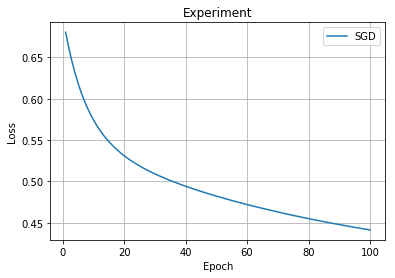

In [9]:
batch_size=10000
nEpochs=100
lr=0.01
# get dataset
# x_train, x_validation, y_train, y_validation = get_dataset(input_data, label)
x_train, y_train = get_data('a9a')
x_validation, y_validation = get_data('a9a.t')

# handle data
temp = np.zeros((len(x_validation), 1))
x_validation = np.column_stack((x_validation, temp))
y_train[y_train==-1] = 0
y_validation[y_validation==-1] = 0

# handle b
train_column = np.ones((len(x_train), 1))
x_train = np.column_stack((x_train, train_column))
validation_column = np.ones((len(x_validation), 1))
x_validation = np.column_stack((x_validation, validation_column))

algorithm = ['SGD']
for a in range(len(algorithm)):

    # initialize the w
    w = initial_w(dimension=(123+1))

    # plot
    training_loss_list = []
    validationing_loss_list = []

    # number of batch
    num_batch = int(len(x_train)/batch_size + 1)

    # initialize the v(t-1) NAG
    v_t_1 = np.zeros((123+1, 1))
    # initialize the g(t-1) RMSProp
    g_t_1 = np.zeros((123+1, 1))
    # initialize the delta(t-1) AdaDelta
    delta_t_1 = np.zeros((123+1, 1))
    # initialize the v(t-1) and m(t-1) Adam
    v_t_1_a = np.zeros((123+1, 1))
    m_t_1 = np.zeros((123+1, 1))

    for i in range(nEpochs):
        training_loss = 0.0
        validationing_loss = 0.0
        # shuffle each batch in different epochs
        shuffle = random.sample(range(len(x_train)), len(x_train))
        for j in range(num_batch):
            # batch
            if j!=num_batch-1:
                # the data in each batch
                x = x_train[shuffle[j*batch_size:(j+1)*batch_size]]
                y = y_train[shuffle[j*batch_size:(j+1)*batch_size]]
            elif j==num_batch-1:
                # the data in each batch
                x = x_train[shuffle[j*batch_size:]]
                y = y_train[shuffle[j*batch_size:]]

            # algorithm
            if algorithm[a]=="SGD":
                # calculate the gradient
                grad = (np.dot(np.transpose(x), (sigmoid(w, x) - y.reshape(-1, 1))))/len(x)
                # update
                w = w - lr * grad            

            # training error and validationing error
            training_loss += -np.mean(y_train.reshape(-1, 1) * np.log(sigmoid(w, x_train)) + (1 - y_train.reshape(-1, 1)) * (np.log(1 - sigmoid(w, x_train))))
            validationing_loss += -np.mean(y_validation.reshape(-1, 1) * np.log(sigmoid(w, x_validation)) + (1 - y_validation.reshape(-1, 1)) * (np.log(1 - sigmoid(w, x_validation))))

        training_loss = training_loss/num_batch
        validationing_loss = validationing_loss/num_batch
        training_loss_list.append(training_loss)
        validationing_loss_list.append(validationing_loss)

    if a==len(algorithm)-1:
        plot_test_loss(testing_loss=validationing_loss_list, algorithm=algorithm[a], show=True)
    else:
        plot_test_loss(testing_loss=validationing_loss_list, algorithm=algorithm[a], show=False)